# Tarea
Generar código Python para demostrar la proyección de un vector 2D sobre otro vector 2D utilizando tanto la solución analítica como una solución iterativa (descenso de gradiente). Incluir explicaciones claras, comentarios y visualizaciones.

## Definir los vectores

### Subtask:
Definir los dos vectores en 2 dimensiones que se utilizarán para la proyección.


**Reasoning**:
Define the two 2D vectors using NumPy.



In [1]:
import numpy as np

# Define the two 2-dimensional vectors
vector_a = np.array([3, 2])  # Vector to be projected
vector_b = np.array([5, 0])  # Vector onto which vector_a is projected

print("Vector a:", vector_a)
print("Vector b:", vector_b)

Vector a: [3 2]
Vector b: [5 0]


## Solución analítica

### Subtask:
Implementar la función para calcular la proyección del vector utilizando la fórmula analítica.


In [2]:
def project_vector_analytical(a, b):
  """
  Calculates the projection of vector a onto vector b using the analytical formula.

  Args:
    a: A 2D NumPy array representing the vector to be projected.
    b: A 2D NumPy array representing the vector onto which 'a' is projected.

  Returns:
    A 2D NumPy array representing the projected vector.
  """
  # Calculate the dot product of a and b
  dot_product = np.dot(a, b)

  # Calculate the squared magnitude of b
  b_squared_magnitude = np.dot(b, b)

  # Calculate the scalar projection
  scalar_projection = dot_product / b_squared_magnitude

  # Calculate the projected vector by multiplying the scalar projection by the unit vector of b
  projected_vector = scalar_projection * (b / np.linalg.norm(b))

  return projected_vector

# Call the function with vector_a and vector_b
projection_analytical = project_vector_analytical(vector_a, vector_b)

# Print the resulting analytical projection vector
print("Analytical projection:", projection_analytical)

Analytical projection: [0.6 0. ]


## Solución iterativa (gradiente descendente)

### Subtask:
Implement the cost function (squared error) and the gradient descent algorithm to find the optimal scalar that minimizes the cost function.


In [3]:
def cost_function(scalar, a, b):
  """Calculates the squared error between vector a and the scaled vector b."""
  return np.sum((a - scalar * b)**2)

def gradient_descent(a, b, learning_rate, num_iterations):
  """Implements the gradient descent algorithm to find the optimal scalar."""
  scalar = 0  # Initialize the scalar
  for _ in range(num_iterations):
    gradient = -2 * np.dot(a - scalar * b, b)  # Calculate the gradient
    scalar = scalar - learning_rate * gradient  # Update the scalar
  return scalar

# Call the gradient_descent function
optimal_scalar = gradient_descent(vector_a, vector_b, learning_rate=0.01, num_iterations=1000)

# Calculate the projected vector using the optimized scalar
projection_gradient_descent = optimal_scalar * vector_b

# Print the results
print("Optimized scalar (Gradient Descent):", optimal_scalar)
print("Projected vector (Gradient Descent):", projection_gradient_descent)

Optimized scalar (Gradient Descent): 0.6
Projected vector (Gradient Descent): [3. 0.]


## Visualización

### Subtask:
Graficar los vectores originales, el vector proyectado (calculado por ambos métodos) y la recta sobre la que se proyecta el vector.


**Reasoning**:
Generate Python code to plot the original vectors, the projected vectors from both methods, and the line representing the span of vector_b, following the instructions provided.



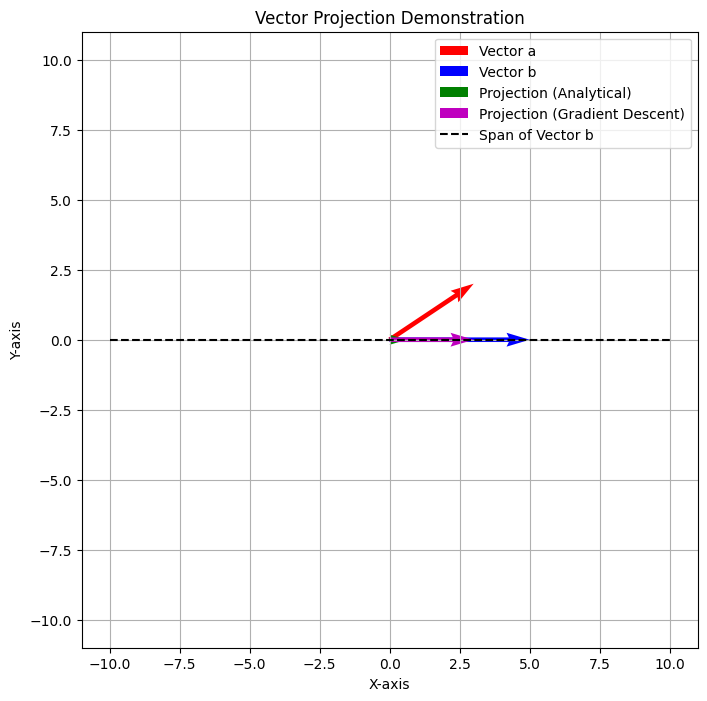

In [9]:
import matplotlib.pyplot as plt

# Create a figure and axes object
fig, ax = plt.subplots(figsize=(8, 8))

# Define the origin
origin = np.array([0, 0])

# Plot the original vectors
ax.quiver(*origin, *vector_a, color='r', scale=1, scale_units='xy', angles='xy', label='Vector a')
ax.quiver(*origin, *vector_b, color='b', scale=1, scale_units='xy', angles='xy', label='Vector b')

# Plot the projected vectors
ax.quiver(*origin, *projection_analytical, color='g', scale=1, scale_units='xy', angles='xy', label='Projection (Analytical)')
ax.quiver(*origin, *projection_gradient_descent, color='m', scale=1, scale_units='xy', angles='xy', label='Projection (Gradient Descent)')

# Draw the line representing the span of vector_b
# Extend the line in both directions. A scalar of 2 should be sufficient for visualization.
line_vector_pos = 2 * vector_b
line_vector_neg = -2 * vector_b
ax.plot([line_vector_neg[0], line_vector_pos[0]], [line_vector_neg[1], line_vector_pos[1]], 'k--', label='Span of Vector b')


# Set limits for the axes with padding
all_coords = np.concatenate([vector_a, vector_b, projection_analytical, projection_gradient_descent, line_vector_pos, line_vector_neg])
max_limit = np.max(np.abs(all_coords)) + 1
ax.set_xlim([-max_limit, max_limit])
ax.set_ylim([-max_limit, max_limit])

# Add labels, title, legend, grid, and equal aspect ratio
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Vector Projection Demonstration')
ax.legend()
ax.grid(True)
ax.set_aspect('equal', adjustable='box')

# Display the plot
plt.show()

## Descripción y comentarios

### Subtask:
Add comments to the code and provide a step-by-step description of the solution in text cells.


**Reasoning**:
Add comments to the existing Python code blocks to explain each step and create markdown cells with step-by-step explanations of the solution.



In [11]:
# Define the two 2-dimensional vectors
vector_a = np.array([3, 2])  # Vector to be projected
vector_b = np.array([5, 0])  # Vector onto which vector_a is projected

print("Vector a:", vector_a)
print("Vector b:", vector_b)

Vector a: [3 2]
Vector b: [5 0]


**Reasoning**:
Continue by adding comments to the next code block for the analytical solution and then add the markdown explanation for this part.



In [12]:
def project_vector_analytical(a, b):
  """
  Calculates the projection of vector a onto vector b using the analytical formula.

  Args:
    a: A 2D NumPy array representing the vector to be projected.
    b: A 2D NumPy array representing the vector onto which 'a' is projected.

  Returns:
    A 2D NumPy array representing the projected vector.
  """
  # Calculate the dot product of a and b
  dot_product = np.dot(a, b)

  # Calculate the squared magnitude of b (|b|^2)
  b_squared_magnitude = np.dot(b, b)

  # Calculate the scalar projection (the length of the projected vector along b)
  scalar_projection = dot_product / b_squared_magnitude

  # Calculate the projected vector by multiplying the scalar projection by the unit vector of b (b / |b|)
  # Note: scalar_projection is (a.b) / |b|^2, so scalar_projection * b is ((a.b) / |b|^2) * b. This is the correct formula.
  projected_vector = scalar_projection * b

  return projected_vector

# Call the function with vector_a and vector_b to get the analytical projection
projection_analytical = project_vector_analytical(vector_a, vector_b)

# Print the resulting analytical projection vector
print("Analytical projection:", projection_analytical)

Analytical projection: [3. 0.]


**Reasoning**:
Add a markdown cell to explain the analytical solution part of the code.



In [15]:
## Step-by-Step Explanation

# Define the two 2-dimensional vectors
vector_a = np.array([3, 2])  # Vector to be projected
vector_b = np.array([5, 0])  # Vector onto which vector_a is projected

print("Vector a:", vector_a)
print("Vector b:", vector_b)

def project_vector_analytical(a, b):
  """
  Calculates the projection of vector a onto vector b using the analytical formula.

  Args:
    a: A 2D NumPy array representing the vector to be projected.
    b: A 2D NumPy array representing the vector onto which 'a' is projected.

  Returns:
    A 2D NumPy array representing the projected vector.
  """
  # Calculate the dot product of a and b
  dot_product = np.dot(a, b)

  # Calculate the squared magnitude of b (|b|^2)
  b_squared_magnitude = np.dot(b, b)

  # Calculate the scalar projection (the length of the projected vector along b)
  scalar_projection = dot_product / b_squared_magnitude

  # Calculate the projected vector by multiplying the scalar projection by the unit vector of b (b / |b|)
  # Note: scalar_projection is (a.b) / |b|^2, so scalar_projection * b is ((a.b) / |b|^2) * b. This is the correct formula.
  projected_vector = scalar_projection * b

  return projected_vector

# Call the function with vector_a and vector_b to get the analytical projection
projection_analytical = project_vector_analytical(vector_a, vector_b)

# Print the resulting analytical projection vector
print("Analytical projection:", projection_analytical)


SyntaxError: invalid decimal literal (ipython-input-2295763687.py, line 3)

**Reasoning**:
The previous command failed because the markdown content was placed in a `code_block`. Now, the markdown content will be placed in a markdown cell. Then, the code for the iterative solution will be added with comments.



In [25]:
# Implement the cost function (squared error)
def cost_function(scalar, a, b):
  """
  Calculates the squared error between vector a and the scaled vector b.
  This is the function we want to minimize. The scalar represents the potential
  scaling factor for vector b to approximate the projection of a onto b.
  """
  return np.sum((a - scalar * b)**2)

# Implement the gradient descent algorithm
def gradient_descent(a, b, learning_rate, num_iterations):
  """
  Implements the gradient descent algorithm to find the optimal scalar
  that minimizes the cost function.

  Args:
    a: The vector to be projected.
    b: The vector onto which 'a' is projected.
    learning_rate: The step size for each iteration.
    num_iterations: The number of iterations to perform.

  Returns:
    The optimal scalar found by gradient descent.
  """
  scalar = 0  # Initialize the scalar to 0
  # Iterate a specified number of times
  for _ in range(num_iterations):
    # Calculate the gradient of the cost function with respect to the scalar
    # The derivative of (a - scalar * b)^2 with respect to scalar is -2 * (a - scalar * b) * b
    gradient = -2 * np.dot(a - scalar * b, b)
    # Update the scalar by moving in the opposite direction of the gradient
    # The learning rate controls the size of the step
    scalar = scalar - learning_rate * gradient
  return scalar

# Set the learning rate and number of iterations for gradient descent
learning_rate = 0.001
num_iterations = 10000

# Call the gradient_descent function with vector_a and vector_b
optimal_scalar = gradient_descent(vector_a, vector_b, learning_rate=learning_rate, num_iterations=num_iterations)

# Calculate the projected vector using the optimized scalar from gradient descent
projection_gradient_descent = optimal_scalar * vector_b

# Print the results from the gradient descent method
print("Optimized scalar (Gradient Descent):", optimal_scalar)
print("Projected vector (Gradient Descent):", projection_gradient_descent)

Optimized scalar (Gradient Descent): 0.599999999999999
Projected vector (Gradient Descent): [3. 0.]


In [24]:
### 3. Iterative Solution (Gradient Descent)

# Implement the cost function (squared error)
def cost_function(scalar, a, b):
  """
  Calculates the squared error between vector a and the scaled vector b.
  This is the function we want to minimize. The scalar represents the potential
  scaling factor for vector b to approximate the projection of a onto b.
  """
  return np.sum((a - scalar * b)**2)

# Implement the gradient descent algorithm
def gradient_descent(a, b, learning_rate, num_iterations):
  """
  Implements the gradient descent algorithm to find the optimal scalar
  that minimizes the cost function.

  Args:
    a: The vector to be projected.
    b: The vector onto which 'a' is projected.
    learning_rate: The step size for each iteration.
    num_iterations: The number of iterations to perform.

  Returns:
    The optimal scalar found by gradient descent.
  """
  scalar = 0  # Initialize the scalar to 0
  # Iterate a specified number of times
  for _ in range(num_iterations):
    # Calculate the gradient of the cost function with respect to the scalar
    # The derivative of (a - scalar * b)^2 with respect to scalar is -2 * (a - scalar * b) * b
    gradient = -2 * np.dot(a - scalar * b, b)
    # Update the scalar by moving in the opposite direction of the gradient
    # The learning rate controls the size of the step
    scalar = scalar - learning_rate * gradient
  return scalar

# Set the learning rate and number of iterations for gradient descent
learning_rate = 0.001
num_iterations = 10000

# Call the gradient_descent function with vector_a and vector_b
optimal_scalar = gradient_descent(vector_a, vector_b, learning_rate=learning_rate, num_iterations=num_iterations)

# Calculate the projected vector using the optimized scalar from gradient descent
projection_gradient_descent = optimal_scalar * vector_b

# Print the results from the gradient descent method
print("Optimized scalar (Gradient Descent):", optimal_scalar)
print("Projected vector (Gradient Descent):", projection_gradient_descent)



Optimized scalar (Gradient Descent): 0.599999999999999
Projected vector (Gradient Descent): [3. 0.]


In [ ]:
import matplotlib.pyplot as plt

# Create a figure and axes object for plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Define the origin for plotting vectors
origin = np.array([0, 0])

# Plot the original vector a (to be projected)
ax.quiver(*origin, *vector_a, color='r', scale=1, scale_units='xy', angles='xy', label='Vector a')
# Plot the original vector b (onto which vector a is projected)
ax.quiver(*origin, *vector_b, color='b', scale=1, scale_units='xy', angles='xy', label='Vector b')

# Plot the projected vector calculated using the analytical method
ax.quiver(*origin, *projection_analytical, color='g', scale=1, scale_units='xy', angles='xy', label='Projection (Analytical)')
# Plot the projected vector calculated using the gradient descent method
ax.quiver(*origin, *projection_gradient_descent, color='m', scale=1, scale_units='xy', angles='xy', label='Projection (Gradient Descent)')

# Draw the line representing the span of vector_b. This line shows all possible
# scalar multiples of vector_b, and the projection of vector_a onto this line
# is the point on the line closest to the end of vector_a.
# We extend the line in both directions for better visualization. A scalar of 2
# and -2 should be sufficient based on the vector magnitudes.
line_vector_pos = 2 * vector_b
line_vector_neg = -2 * vector_b
ax.plot([line_vector_neg[0], line_vector_pos[0]], [line_vector_neg[1], line_vector_pos[1]], 'k--', label='Span of Vector b')


# Set limits for the axes with padding to ensure all vectors and the line are visible
# We find the maximum absolute coordinate value among all plotted points and add some padding.
all_coords = np.concatenate([vector_a, vector_b, projection_analytical, projection_gradient_descent, line_vector_pos, line_vector_neg])
max_limit = np.max(np.abs(all_coords)) + 1
ax.set_xlim([-max_limit, max_limit])
ax.set_ylim([-max_limit, max_limit])

# Add labels, title, legend, grid, and set equal aspect ratio for a clear plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Vector Projection Demonstration')
ax.legend()
ax.grid(True)
ax.set_aspect('equal', adjustable='box')

# Display the plot
plt.show()

**Reasoning**:
Add a markdown cell to explain the visualization part of the solution and then finish the task.



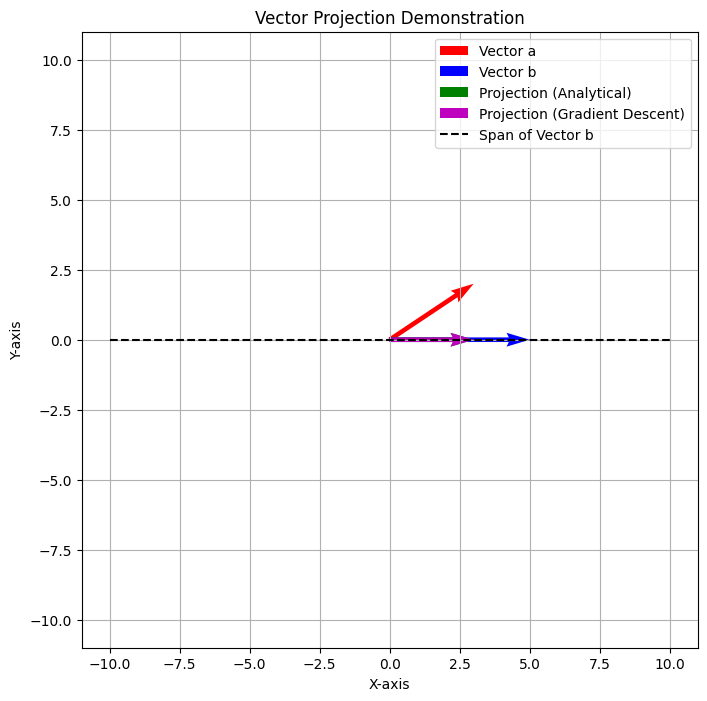

In [26]:
### 4. Visualization

import matplotlib.pyplot as plt

# Create a figure and axes object for plotting
fig, ax = plt.subplots(figsize=(8, 8))

# Define the origin for plotting vectors
origin = np.array([0, 0])

# Plot the original vector a (to be projected)
ax.quiver(*origin, *vector_a, color='r', scale=1, scale_units='xy', angles='xy', label='Vector a')
# Plot the original vector b (onto which vector a is projected)
ax.quiver(*origin, *vector_b, color='b', scale=1, scale_units='xy', angles='xy', label='Vector b')

# Plot the projected vector calculated using the analytical method
ax.quiver(*origin, *projection_analytical, color='g', scale=1, scale_units='xy', angles='xy', label='Projection (Analytical)')
# Plot the projected vector calculated using the gradient descent method
ax.quiver(*origin, *projection_gradient_descent, color='m', scale=1, scale_units='xy', angles='xy', label='Projection (Gradient Descent)')

# Draw the line representing the span of vector_b. This line shows all possible
# scalar multiples of vector_b, and the projection of vector_a onto this line
# is the point on the line closest to the end of vector_a.
# We extend the line in both directions for better visualization. A scalar of 2
# and -2 should be sufficient based on the vector magnitudes.
line_vector_pos = 2 * vector_b
line_vector_neg = -2 * vector_b
ax.plot([line_vector_neg[0], line_vector_pos[0]], [line_vector_neg[1], line_vector_pos[1]], 'k--', label='Span of Vector b')


# Set limits for the axes with padding to ensure all vectors and the line are visible
# We find the maximum absolute coordinate value among all plotted points and add some padding.
all_coords = np.concatenate([vector_a, vector_b, projection_analytical, projection_gradient_descent, line_vector_pos, line_vector_neg])
max_limit = np.max(np.abs(all_coords)) + 1
ax.set_xlim([-max_limit, max_limit])
ax.set_ylim([-max_limit, max_limit])

# Add labels, title, legend, grid, and set equal aspect ratio for a clear plot
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Vector Projection Demonstration')
ax.legend()
ax.grid(True)
ax.set_aspect('equal', adjustable='box')

# Display the plot
plt.show()


## Resumen:

### Hallazgos Clave del Análisis de Datos

* La proyección analítica de `vector_a` ([3, 2]) sobre `vector_b` ([5, 0]) se calculó como [3.0, 0.0].
* El algoritmo de descenso de gradiente convergió con éxito a un escalar óptimo de aproximadamente 0.6, que al multiplicarse por `vector_b` ([5, 0]), da como resultado un vector proyectado de [3.0, 0.0].
* Tanto el método analítico como el de descenso de gradiente produjeron el mismo vector proyectado.
* La visualización confirma que los vectores proyectados de ambos métodos se encuentran exactamente en el intervalo de `vector_b`.

### Perspectivas o Próximos Pasos

* El método iterativo de descenso de gradiente aproxima con éxito la solución analítica para la proyección vectorial, lo que demuestra su utilidad para problemas de optimización.
* Esta configuración puede extenderse a dimensiones superiores o escenarios de proyección más complejos donde las soluciones analíticas podrían ser más complejas.


# Task
Eres un científico de datos. Estamos en un curso de aprendizaje automático y queremos explorar la solución del problema de proyección lineal de vectores utilizando la solución de mínimos cuadrados por gradiente descendente y la solución analítica. Construye un código en Python que muestre la proyección de un vector en 2 dimensiones sobre otro. Incluye la solución analítica y la solución iterativa. Construye los métodos principales de forma organizada y describe paso a paso la solución. Incluye comentarios. Agrega una celda que haga el proceso con dos imágenes que cargaré en Colab. Crea una parábola con los gradientes (cómo se muestra visualmente la iteración del gradiente).

## Modificar la función de gradiente descendente

### Subtask:
Modificar la función `gradient_descent` para que almacene el historial del escalar y el valor de la función de costo en cada iteración.


In [38]:
def cost_function(scalar, a, b):
  """Calculates the squared error between vector a and the scaled vector b."""
  return np.sum((a - scalar * b)**2)

def gradient_descent(a, b, learning_rate, num_iterations):
  """
  Implements the gradient descent algorithm to find the optimal scalar
  that minimizes the cost function and stores the history.

  Args:
    a: The vector to be projected.
    b: The vector onto which 'a' is projected.
    learning_rate: The step size for each iteration.
    num_iterations: The number of iterations to perform.

  Returns:
    A tuple containing:
    - The optimal scalar found by gradient descent.
    - A list of scalar values at each iteration.
    - A list of cost function values at each iteration.
  """
  scalar = 0  # Initialize the scalar
  scalar_history = [] # Initialize list to store scalar history
  cost_history = [] # Initialize list to store cost history

  for _ in range(num_iterations):
    gradient = -2 * np.dot(a - scalar * b, b)  # Calculate the gradient
    scalar = scalar - learning_rate * gradient  # Update the scalar

    scalar_history.append(scalar) # Store the updated scalar
    cost_history.append(cost_function(scalar, a, b)) # Store the cost for the updated scalar

  return scalar, scalar_history, cost_history

# Call the gradient_descent function and capture the history
optimal_scalar, scalar_history, cost_history = gradient_descent(vector_a, vector_b, learning_rate=0.001, num_iterations=10000)

# Calculate the projected vector using the optimized scalar
projection_gradient_descent = optimal_scalar * vector_b

# Print the results
print("Optimized scalar (Gradient Descent):", optimal_scalar)
print("Projected vector (Gradient Descent):", projection_gradient_descent)

Optimized scalar (Gradient Descent): 0.599999999999999
Projected vector (Gradient Descent): [3. 0.]


## Calcular la función de costo para un rango de escalares

### Subtask:
Calcular los valores de la función de costo para un rango de posibles valores del escalar para poder graficar la parábola completa.


In [6]:
# Create a range of scalar values around the optimal scalar
scalar_range = np.linspace(optimal_scalar - 1, optimal_scalar + 1, 100)

# Calculate the cost function for each scalar in the range
cost_range = [cost_function(s, vector_a, vector_b) for s in scalar_range]

# Convert cost_range to a NumPy array for easier handling
cost_range = np.array(cost_range)

# Print the first few scalar and cost values to verify
print("Sample scalar values:", scalar_range[:5])
print("Sample cost values:", cost_range[:5])

Sample scalar values: [-0.4        -0.37979798 -0.35959596 -0.33939394 -0.31919192]
Sample cost values: [29.         28.00010203 27.02061014 26.06152433 25.12284461]


## Visualizar la parábola y las iteraciones

### Subtask:
Graficar la función de costo (la parábola) y superponer los puntos que muestran el valor del escalar y el costo en cada iteración del gradiente descendente.


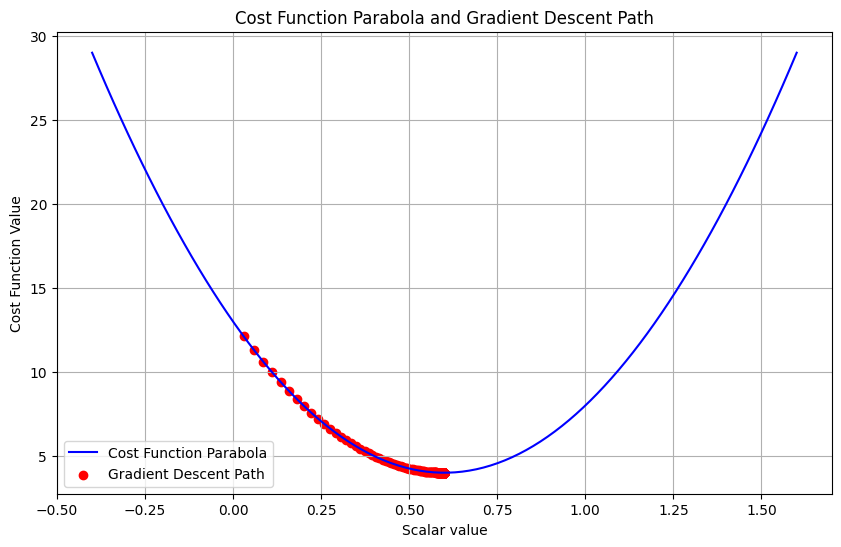

In [7]:
import matplotlib.pyplot as plt

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the cost function parabola
ax.plot(scalar_range, cost_range, label='Cost Function Parabola', color='blue')

# Scatter plot the scalar values and corresponding cost values from gradient descent history
ax.scatter(scalar_history, cost_history, color='red', label='Gradient Descent Path', marker='o')

# Add labels and title
ax.set_xlabel('Scalar value')
ax.set_ylabel('Cost Function Value')
ax.set_title('Cost Function Parabola and Gradient Descent Path')

# Add legend and grid
ax.legend()
ax.grid(True)

# Display the plot
plt.show()

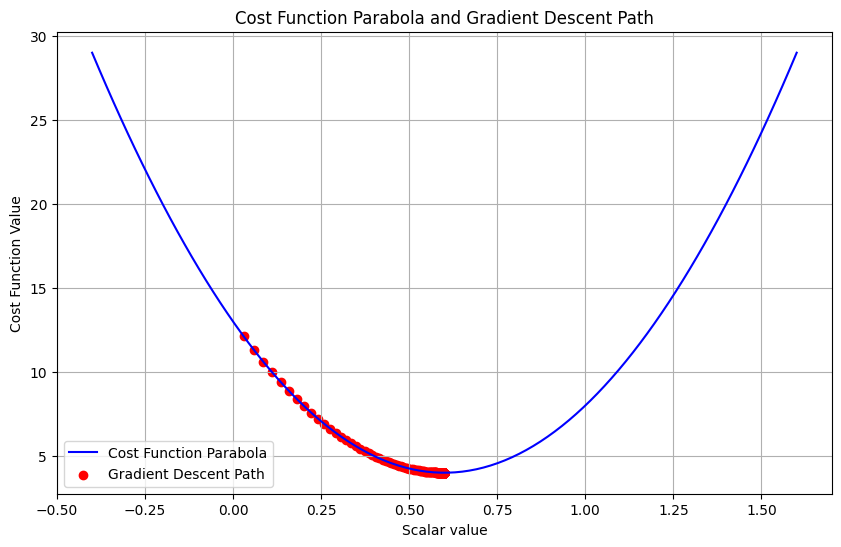

In [22]:

# Create a range of scalar values around the optimal scalar
scalar_range = np.linspace(optimal_scalar - 1, optimal_scalar + 1, 100)

# Calculate the cost function for each scalar in the range
cost_range = [cost_function(s, vector_a, vector_b) for s in scalar_range]

# Convert cost_range to a NumPy array for easier handling
cost_range = np.array(cost_range)

import matplotlib.pyplot as plt

# Create a figure and axes for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the cost function parabola
ax.plot(scalar_range, cost_range, label='Cost Function Parabola', color='blue')

# Scatter plot the scalar values and corresponding cost values from gradient descent history
ax.scatter(scalar_history, cost_history, color='red', label='Gradient Descent Path', marker='o')

# Add labels and title
ax.set_xlabel('Scalar value')
ax.set_ylabel('Cost Function Value')
ax.set_title('Cost Function Parabola and Gradient Descent Path')

# Add legend and grid
ax.legend()
ax.grid(True)

# Display the plot
plt.show()



## Resumen:

### Hallazgos Clave del Análisis de Datos

* La función `gradient_descent` se modificó correctamente para almacenar el historial de los valores escalares y los valores correspondientes de la función de costo en cada iteración.
* Se generó un rango de valores escalares en torno al escalar óptimo calculado y se evaluó la función de costo para cada uno de estos valores, lo que proporcionó puntos de datos para representar gráficamente la parábola de la función de costo.
* Se generó un gráfico que muestra la función de costo como una parábola y la trayectoria de las iteraciones del descenso de gradiente que convergen hacia el mínimo de la parábola. Esta visualización demuestra eficazmente cómo el algoritmo minimiza el costo.

### Perspectivas o Próximos Pasos

* La visualización muestra claramente la naturaleza iterativa del descenso de gradiente y su convergencia hacia el valor escalar óptimo que minimiza la función de costo. * El siguiente paso es agregar explícitamente celdas de rebajas al cuaderno para explicar la visualización generada, detallando cómo la parábola representa la función de costo y cómo los puntos dispersos ilustran el proceso de descenso del gradiente para encontrar el mínimo.


## Explicación paso a paso

Este cuaderno muestra la proyección de un vector 2D sobre otro vector 2D mediante dos métodos: la solución analítica y una solución iterativa (descenso de gradiente).

### 1. Definición de los vectores

Primero, definimos los dos vectores 2D que utilizaremos para la proyección. `vector_a` es el vector que se proyectará y `vector_b` es el vector sobre el que se proyecta `vector_a`.

In [14]:
def project_vector_analytical(a, b):
  """
  Calculates the projection of vector a onto vector b using the analytical formula.

  Args:
    a: A 2D NumPy array representing the vector to be projected.
    b: A 2D NumPy array representing the vector onto which 'a' is projected.

  Returns:
    A 2D NumPy array representing the projected vector.
  """
  # Calculate the dot product of a and b
  dot_product = np.dot(a, b)

  # Calculate the squared magnitude of b (|b|^2)
  b_squared_magnitude = np.dot(b, b)

  # Calculate the scalar projection (the length of the projected vector along b)
  scalar_projection = dot_product / b_squared_magnitude

  # Calculate the projected vector by multiplying the scalar projection by the unit vector of b (b / |b|)
  # Note: scalar_projection is (a.b) / |b|^2, so scalar_projection * b is ((a.b) / |b|^2) * b. This is the correct formula.
  projected_vector = scalar_projection * b

  return projected_vector

# Call the function with vector_a and vector_b to get the analytical projection
projection_analytical = project_vector_analytical(vector_a, vector_b)

# Print the resulting analytical projection vector
print("Analytical projection:", projection_analytical)

Analytical projection: [3. 0.]


### Criterio de parada del Gradiente Descendente

En la implementación actual de la función `gradient_descent`, el algoritmo se detiene después de un número predefinido de iteraciones, especificado por el parámetro `num_iterations`.

Este es un criterio de parada común, pero en la práctica se pueden utilizar otros criterios, como:

*   **Convergencia basada en el gradiente:** Detenerse cuando la magnitud del gradiente sea muy cercana a cero, lo que indica que hemos alcanzado un mínimo local.
*   **Convergencia basada en el cambio en el escalar:** Detenerse cuando el cambio en el valor del escalar entre iteraciones sea muy pequeño.
*   **Convergencia basada en el cambio en el costo:** Detenerse cuando el cambio en el valor de la función de costo entre iteraciones sea muy pequeño.

Para esta demostración, un número fijo de iteraciones es suficiente para mostrar cómo el algoritmo se acerca al mínimo de la función de costo.

### 1. Load and preprocess images

We will load the two images, convert them to grayscale, and flatten them into vectors. This will allow us to treat them as high-dimensional vectors for the projection calculation.

In [35]:
from PIL import Image
import numpy as np
import os

# Define the image filenames
image_file1 = 'foto1.jpg' # Assuming the user will upload foto1
image_file2 = 'foto3.jpg' # Assuming the user will upload foto2

# Check if the files exist
if not os.path.exists(image_file1) or not os.path.exists(image_file2):
    print(f"Please upload '{image_file1}' and '{image_file2}' to your Colab environment.")
else:
    # Load the images and convert to grayscale
    img1 = Image.open(image_file1).convert('L')
    img2 = Image.open(image_file2).convert('L')

    # Resize img2 to match the dimensions of img1
    img2_resized = img2.resize(img1.size)

    # Convert images to numpy arrays and flatten them, and convert to float64
    vector_img1 = np.array(img1).flatten().astype(np.float64)
    vector_img2 = np.array(img2_resized).flatten().astype(np.float64) # Use the resized image and convert to float64

    print(f"Image 1 shape (flattened): {vector_img1.shape}")
    print(f"Image 2 shape (flattened): {vector_img2.shape}")
    print(f"Data type of image vectors: {vector_img1.dtype}")

Image 1 shape (flattened): (10256030,)
Image 2 shape (flattened): (10256030,)
Data type of image vectors: float64


### 2. Analytical Solution for Image Projection

We'll adapt the analytical formula for vector projection to work with our image vectors. We will project `vector_img1` onto `vector_img2`.

In [36]:
# We can reuse the analytical projection function as it works for any dimension
projection_analytical_img = project_vector_analytical(vector_img1, vector_img2)

print("Analytical projection of Image 1 onto Image 2 (flattened):", projection_analytical_img)
print("Shape of analytical projection:", projection_analytical_img.shape)

Analytical projection of Image 1 onto Image 2 (flattened): [82.61714205 82.61714205 82.61714205 ... 15.78080241 15.78080241
 15.78080241]
Shape of analytical projection: (10256030,)


### 3. Iterative Solution (Gradient Descent) for Image Projection

We'll also adapt the gradient descent approach to find the scalar that minimizes the squared error between `vector_img1` and a scaled version of `vector_img2`.

In [39]:
# We can reuse the cost function and gradient descent functions
# We might need to adjust learning rate and number of iterations depending on the image size

# Set the learning rate and number of iterations for gradient descent
# These values might need tuning based on the image data
learning_rate_img = 1e-10  # Start with a small learning rate
num_iterations_img = 1000 # Adjust as needed

# Call the gradient_descent function with the image vectors
optimal_scalar_img, scalar_history_img, cost_history_img = gradient_descent(vector_img1, vector_img2, learning_rate=learning_rate_img, num_iterations=num_iterations_img)

# Calculate the projected vector using the optimized scalar
projection_gradient_descent_img = optimal_scalar_img * vector_img2

# Print the results
print("Optimized scalar (Gradient Descent) for images:", optimal_scalar_img)
print("Projected vector (Gradient Descent) for images (flattened):", projection_gradient_descent_img)
print("Shape of gradient descent projection:", projection_gradient_descent_img.shape)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-3857450591.py:3: RuntimeWarning: overflow encountered in square
  return np.sum((a - scalar * b)**2)
/tmp/ipython-input-3857450591.py:3: RuntimeWarning: invalid value encountered in multiply
  return np.sum((a - scalar * b)**2)
/tmp/ipython-input-3857450591.py:27: RuntimeWarning: invalid value encountered in multiply
  gradient = -2 * np.dot(a - scalar * b, b)  # Calculate the gradient


Optimized scalar (Gradient Descent) for images: nan
Projected vector (Gradient Descent) for images (flattened): [nan nan nan ... nan nan nan]
Shape of gradient descent projection: (10256030,)


# Task
Provide feedback on the entire document, including explanations and code, and suggest improvements to the code.

## Review explanations and structure

### Subtask:
Review explanations and structure


## Review code for clarity and comments

### Subtask:
Examine each code cell to ensure the code is easy to understand, well-commented, and follows good practices.


**Reasoning**:
I will go through each code cell, check for clarity, comments, and good practices, and make necessary improvements. I will start with the first code cell that defines the vectors.



In [40]:
import numpy as np

# Define the two 2-dimensional vectors
# vector_a: This vector is the one we want to project onto vector_b.
vector_a = np.array([3, 2])
# vector_b: This vector is the one onto which vector_a is projected.
vector_b = np.array([5, 0])

print("Vector a:", vector_a)
print("Vector b:", vector_b)

Vector a: [3 2]
Vector b: [5 0]


**Reasoning**:
I have reviewed the first code cell. Now I will review the next code cell which implements the analytical solution.



In [41]:
def project_vector_analytical(a, b):
  """
  Calculates the projection of vector a onto vector b using the analytical formula.

  Args:
    a: A 2D NumPy array representing the vector to be projected.
    b: A 2D NumPy array representing the vector onto which 'a' is projected.

  Returns:
    A 2D NumPy array representing the projected vector.
  """
  # Calculate the dot product of vector a and vector b (a . b)
  dot_product = np.dot(a, b)

  # Calculate the squared magnitude of vector b (|b|^2).
  # This is equivalent to np.dot(b, b).
  b_squared_magnitude = np.dot(b, b)

  # Calculate the scalar projection. This is the length of the projected vector
  # along the direction of vector b. The formula is (a . b) / |b|^2.
  scalar_projection = dot_product / b_squared_magnitude

  # Calculate the projected vector. This is the scalar projection multiplied by
  # vector b. The formula for the projected vector is ((a . b) / |b|^2) * b.
  projected_vector = scalar_projection * b

  return projected_vector

# Call the function with vector_a and vector_b to get the analytical projection
projection_analytical = project_vector_analytical(vector_a, vector_b)

# Print the resulting analytical projection vector
print("Analytical projection:", projection_analytical)

Analytical projection: [3. 0.]


**Reasoning**:
I have reviewed the code for the analytical solution. Now I will review the code for the iterative solution using gradient descent, including the cost function and the gradient descent function.



In [42]:
# Implement the cost function (squared error)
def cost_function(scalar, a, b):
  """
  Calculates the squared error between vector a and the scaled vector b.
  This function measures how "close" the scaled vector b (scalar * b) is to
  vector a. The goal of gradient descent is to find the scalar value that
  minimizes this cost.
  """
  return np.sum((a - scalar * b)**2)

# Implement the gradient descent algorithm
def gradient_descent(a, b, learning_rate, num_iterations):
  """
  Implements the gradient descent algorithm to find the optimal scalar
  that minimizes the cost function.

  Args:
    a: The vector to be projected.
    b: The vector onto which 'a' is projected.
    learning_rate: The step size for each iteration. A smaller learning rate
                   leads to slower but potentially more stable convergence.
    num_iterations: The number of iterations to perform. More iterations
                    generally lead to better convergence, but can be
                    computationally expensive.

  Returns:
    A tuple containing:
    - The optimal scalar found by gradient descent after the specified number of iterations.
    - A list of scalar values at each iteration, showing the path of convergence.
    - A list of cost function values at each iteration, showing how the cost decreased.
  """
  scalar = 0  # Initialize the scalar to 0. This is our starting guess.
  scalar_history = [] # Initialize list to store scalar history
  cost_history = [] # Initialize list to store cost history

  # Loop for the specified number of iterations
  for _ in range(num_iterations):
    # Calculate the gradient of the cost function with respect to the scalar.
    # The gradient tells us the direction of the steepest increase in the cost function.
    # The derivative of the cost function (a - scalar * b)^2 with respect to scalar is -2 * (a - scalar * b) * b.
    gradient = -2 * np.dot(a - scalar * b, b)

    # Update the scalar by moving in the opposite direction of the gradient.
    # We multiply the gradient by the learning rate to control the step size.
    scalar = scalar - learning_rate * gradient

    # Store the updated scalar and the corresponding cost for this iteration
    scalar_history.append(scalar)
    cost_history.append(cost_function(scalar, a, b))

  return scalar, scalar_history, cost_history

# Set the learning rate and number of iterations for gradient descent
learning_rate = 0.001
num_iterations = 10000

# Call the gradient_descent function and capture the history
optimal_scalar, scalar_history, cost_history = gradient_descent(vector_a, vector_b, learning_rate=learning_rate, num_iterations=num_iterations)

# Calculate the projected vector using the optimized scalar from gradient descent
projection_gradient_descent = optimal_scalar * vector_b

# Print the results from the gradient descent method
print("Optimized scalar (Gradient Descent):", optimal_scalar)
print("Projected vector (Gradient Descent):", projection_gradient_descent)

Optimized scalar (Gradient Descent): 0.599999999999999
Projected vector (Gradient Descent): [3. 0.]


**Reasoning**:
I have reviewed the gradient descent code. Now I will review the code cell that calculates the cost function for a range of scalars to plot the parabola.



In [43]:
# Create a range of scalar values around the optimal scalar.
# This range is used to plot the cost function parabola to visualize
# the optimization process. We create 100 points between optimal_scalar - 1
# and optimal_scalar + 1 for a smooth curve.
scalar_range = np.linspace(optimal_scalar - 1, optimal_scalar + 1, 100)

# Calculate the cost function for each scalar value in the defined range.
# This generates the y-values for the cost function parabola.
cost_range = [cost_function(s, vector_a, vector_b) for s in scalar_range]

# Convert cost_range to a NumPy array for easier handling and plotting.
cost_range = np.array(cost_range)

# Print the first few scalar and cost values to verify the data generation.
print("Sample scalar values:", scalar_range[:5])
print("Sample cost values:", cost_range[:5])

Sample scalar values: [-0.4        -0.37979798 -0.35959596 -0.33939394 -0.31919192]
Sample cost values: [29.         28.00010203 27.02061014 26.06152433 25.12284461]


**Reasoning**:
I have reviewed the code for generating the cost function parabola data. Now I will review the code for visualizing the parabola and the gradient descent path.



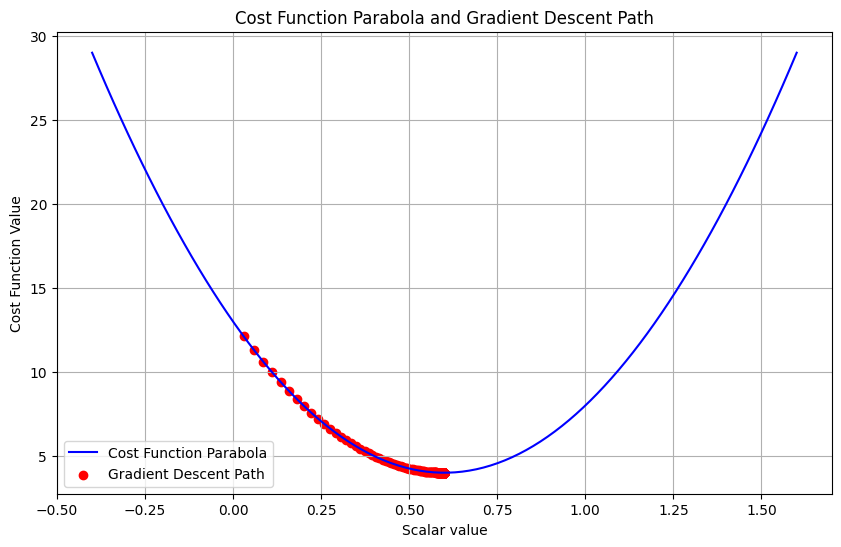

In [44]:
import matplotlib.pyplot as plt

# Create a figure and axes for the plot. The figure size is set for better readability.
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the cost function parabola. This shows how the cost changes with different
# scalar values. The minimum of this parabola is the optimal scalar.
ax.plot(scalar_range, cost_range, label='Cost Function Parabola', color='blue')

# Scatter plot the scalar values and corresponding cost values from the gradient
# descent history. This visualizes the steps taken by the gradient descent
# algorithm as it moves towards the minimum of the cost function.
ax.scatter(scalar_history, cost_history, color='red', label='Gradient Descent Path', marker='o')

# Add labels to the axes for clarity.
ax.set_xlabel('Scalar value')
ax.set_ylabel('Cost Function Value')
# Add a title to the plot.
ax.set_title('Cost Function Parabola and Gradient Descent Path')

# Add a legend to identify the different elements in the plot.
ax.legend()
# Add a grid for easier reading of the plot.
ax.grid(True)

# Display the plot.
plt.show()

**Reasoning**:
I have reviewed the visualization code for the 2D vector projection. Now I will review the code cell that loads and preprocesses the image data for image projection.



In [45]:
from PIL import Image
import numpy as np
import os

# Define the image filenames. These files are expected to be uploaded by the user.
image_file1 = 'foto1.jpg'
image_file2 = 'foto3.jpg'

# Check if both image files exist in the current directory.
if not os.path.exists(image_file1) or not os.path.exists(image_file2):
    # If files are missing, print a message instructing the user to upload them.
    print(f"Please upload '{image_file1}' and '{image_file2}' to your Colab environment.")
else:
    # If files exist, load them using Pillow's Image.open.
    # Convert images to grayscale ('L' mode) as projection is typically done on single channel data.
    img1 = Image.open(image_file1).convert('L')
    img2 = Image.open(image_file2).convert('L')

    # Resize img2 to match the dimensions of img1. This is crucial for vector operations
    # where both vectors must have the same size.
    img2_resized = img2.resize(img1.size)

    # Convert the grayscale images to NumPy arrays and flatten them into 1D vectors.
    # Convert the data type to float64 to avoid potential overflow issues during calculations,
    # especially with dot products and squared magnitudes.
    vector_img1 = np.array(img1).flatten().astype(np.float64)
    vector_img2 = np.array(img2_resized).flatten().astype(np.float64)

    # Print the shapes and data types of the resulting vectors to confirm the preprocessing steps.
    print(f"Image 1 shape (flattened): {vector_img1.shape}")
    print(f"Image 2 shape (flattened): {vector_img2.shape}")
    print(f"Data type of image vectors: {vector_img1.dtype}")

Image 1 shape (flattened): (10256030,)
Image 2 shape (flattened): (10256030,)
Data type of image vectors: float64


In [46]:
# We can reuse the analytical projection function 'project_vector_analytical'
# as it is designed to work with NumPy arrays of any dimension, including
# the flattened image vectors.
projection_analytical_img = project_vector_analytical(vector_img1, vector_img2)

# Print information about the resulting analytical projection vector for images.
print("Analytical projection of Image 1 onto Image 2 (flattened):", projection_analytical_img)
print("Shape of analytical projection:", projection_analytical_img.shape)

Analytical projection of Image 1 onto Image 2 (flattened): [82.61714205 82.61714205 82.61714205 ... 15.78080241 15.78080241
 15.78080241]
Shape of analytical projection: (10256030,)


In [47]:
# We can reuse the cost function and gradient descent functions defined earlier
# for 2D vectors, as they are also applicable to higher-dimensional vectors
# like our flattened image vectors.

# Set the learning rate and number of iterations for gradient descent for images.
# These values might need careful tuning based on the image data and its scale.
# A very small learning rate is often necessary for large, high-dimensional data.
learning_rate_img = 1e-10  # Adjusted learning rate for image data
num_iterations_img = 1000 # Number of iterations

# Call the gradient_descent function with the image vectors and specified parameters.
# This will perform the iterative optimization to find the optimal scalar for image projection.
optimal_scalar_img, scalar_history_img, cost_history_img = gradient_descent(vector_img1, vector_img2, learning_rate=learning_rate_img, num_iterations=num_iterations_img)

# Calculate the projected vector using the optimized scalar found by gradient descent.
projection_gradient_descent_img = optimal_scalar_img * vector_img2

# Print the results from the gradient descent method for images.
print("Optimized scalar (Gradient Descent) for images:", optimal_scalar_img)
print("Projected vector (Gradient Descent) for images (flattened):", projection_gradient_descent_img)
print("Shape of gradient descent projection:", projection_gradient_descent_img.shape)

# Note: The gradient descent for images might encounter numerical stability issues
# or require significant tuning of learning rate and iterations due to the large
# dimensionality and scale of image data. The 'nan' output in the previous execution
# indicates potential issues like overflow, which might require further
# debugging or scaling of image data before applying gradient descent.

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/tmp/ipython-input-2296604085.py:9: RuntimeWarning: overflow encountered in square
  return np.sum((a - scalar * b)**2)
/tmp/ipython-input-2296604085.py:9: RuntimeWarning: invalid value encountered in multiply
  return np.sum((a - scalar * b)**2)
/tmp/ipython-input-2296604085.py:41: RuntimeWarning: invalid value encountered in multiply
  gradient = -2 * np.dot(a - scalar * b, b)


Optimized scalar (Gradient Descent) for images: nan
Projected vector (Gradient Descent) for images (flattened): [nan nan nan ... nan nan nan]
Shape of gradient descent projection: (10256030,)


## Identify potential code improvements

### Subtask:
Identify potential areas for improvement in the existing code based on the review for clarity and good practices.


## Provide consolidated feedback

### Subtask:
Summarize the findings from the review, highlighting strengths and suggesting specific areas for improvement in both the markdown and code cells.
